### 데이터 불러와서 파악하기

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

In [16]:
# os x(mac os) 한글 font
rc('font', family = 'AppleGothic')
%matplotlib inline      # 노트북 안에 그래프를 그리기 위해 셋팅
plt.style.use("ggplot") # 그래프를 격자 스타일로
mpl.rcParams["axes.unicode_minus"] = False # 그래프에서 마이너스 폰트 깨지는 문제 해결

UsageError: unrecognized arguments: # 노트북 안에 그래프를 그리기 위해 셋팅


In [ ]:
train_data = pd.read_csv("./titanic/train.csv")

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### null인 데이터 시각화 하기

<AxesSubplot:>

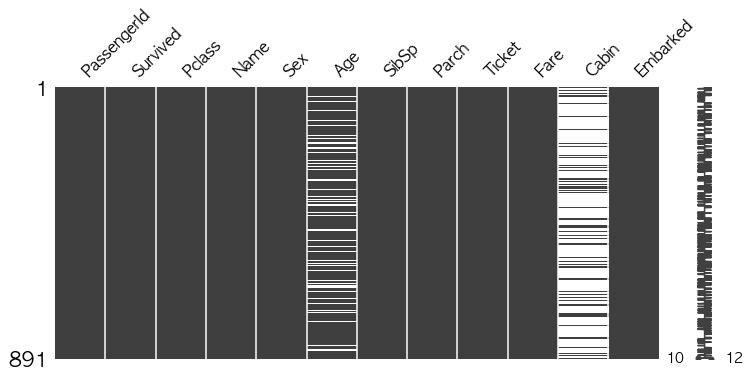

In [19]:
import missingno as msno
msno.matrix(train_data, figsize = (12, 5))

### Discrete Data를 bar 그래프로 시각화

In [27]:
def bar_chart(feature, ax=None):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, ax = ax)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Fram

[Text(0.5, 1.0, '승선 장소')]

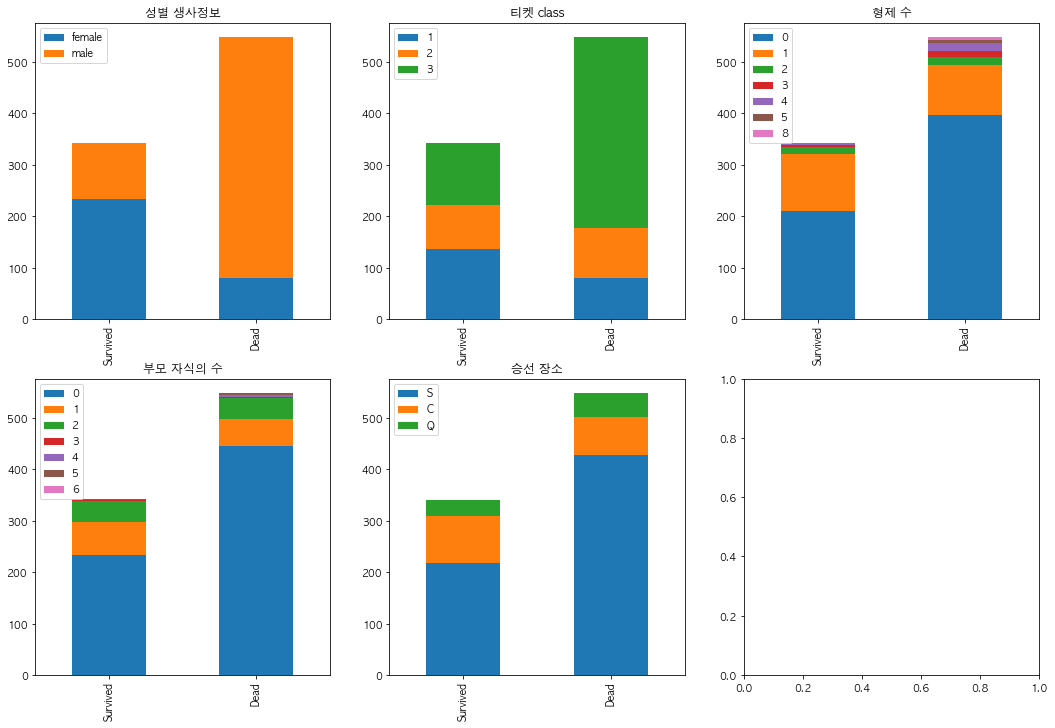

In [28]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 12)
bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)
ax1.set(title = '성별 생사정보')
ax2.set(title = '티켓 class')
ax3.set(title = '형제 수')
ax4.set(title = '부모 자식의 수')
ax5.set(title = '승선 장소')

In [34]:
def draw_facetgrid(feature):
    # train_data에 저장된 DataFrame을 FacetGrid를 통해 그래프로 그려줍니다. 
    # hue="Survived"는 그래프의 범례(legend)의 이름을 설정합니다.
    # aspect=5 는 그래프의 종횡비를 설정해줍니다.
    facet = sns.FacetGrid(train_data, 
                          hue = "Survived", # 어떤 데이터를 기준으로 나눌것인지?
                          aspect = 5)       
    # facet.map()은 kedplot 방식을 사용하여 주어진 데이터 feature를 plotting 하는 
    # 즉, 그래프를 그리는 기능을 합니다.
    facet.map(sns.kdeplot, 
              feature,       
              shade = True)
    # 0 부터 값의 주어진 데이터의 최대 값까지를 x축의 범위로 설정합니다.
    facet.set(xlim = (0, train_data[feature].max()))
    # 지정된 범례(legend)를 표시.
    facet.add_legend()
    plt.show()

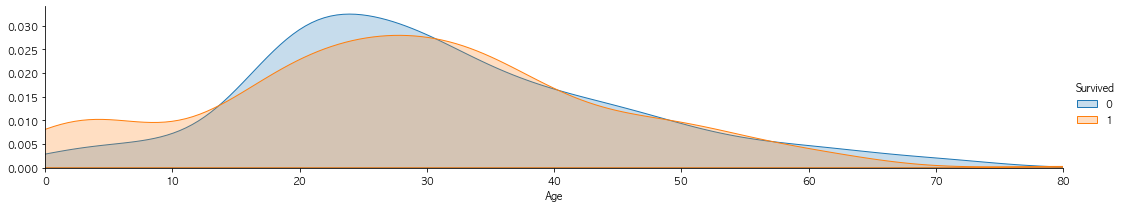

In [35]:
draw_facetgrid('Age')

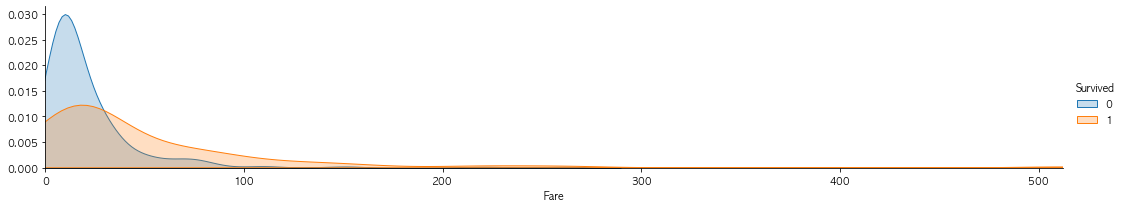

In [36]:
draw_facetgrid('Fare')

In [63]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 타이타닉 탄 사람들의 PClass별 cabin 시각화

<AxesSubplot:>

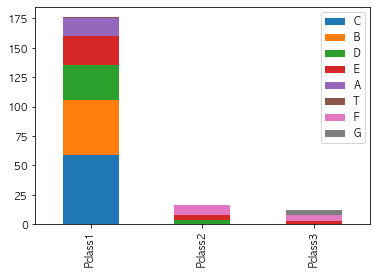

In [86]:
train_data['Cabin'] = train_data['Cabin'].str[:1]

Pclass1 = train_data.query("Pclass == 1")['Cabin'].value_counts()
Pclass2 = train_data.query("Pclass == 2")['Cabin'].value_counts()
Pclass3 = train_data.query("Pclass == 3")['Cabin'].value_counts()

fig, ax = plt.subplots()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Pclass1', 'Pclass2', 'Pclass3'] 
df.plot(kind = 'bar', stacked = True, ax = ax)